# Reproducibility assessment of read alignment tools
## This is a draft (should be adapted once the naming convention is correct)

In [1]:
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from natsort import natsorted, natsort_keygen
import re
from itertools import chain

## CPU, run time, etc. violin plots (@Belin)
### Below is an example with two tools, should be done for all tools and indexing
### we should decide if it is worth reporting by replicate type

In [2]:
stats_file = "/Users/fulbe/tools_stats.csv"

In [3]:
df_stats = pd.read_csv(stats_file)
df_stats[df_stats['tool'] == 'ngm']['ram'].unique()
df_stats.head()

,Unnamed: 0,tool,sampID,repType,cpu,ram,utime
0,0,hisat2,ERR009308,g,1.1167,4.359488,1.049598
1,1,hisat2,ERR009308,rc,1.3111,4.359488,1.230937
2,2,hisat2,ERR009308,sh1,0.9677,4.359488,0.913906
3,3,hisat2,ERR009308,sh2,0.9211,4.359488,0.872478
4,4,hisat2,ERR009308,sh3,1.1230,4.359488,1.042094


In [4]:
df_stats['repType'] = df_stats['repType'].apply(lambda x: re.sub(r'\d+', '', x))
avg_df_stats = df_stats.groupby(['tool', 'sampID', 'repType'])['cpu', 'ram', 'utime'].mean().reset_index()
avg_df_stats['repType'].unique()
avg_df_stats.head()

C:\Temp\ipykernel_1736\1042937747.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_df_stats = df_stats.groupby(['tool', 'sampID', 'repType'])['cpu', 'ram', 'utime'].mean().reset_index()


,tool,sampID,repType,cpu,ram,utime
0,bowtie2,ERR009308,both,4.524900,3.361888,4.389090
1,bowtie2,ERR009308,g,2.894600,7.838720,2.845080
2,bowtie2,ERR009308,rc,4.854400,3.466240,4.622290
3,bowtie2,ERR009308,sh,4.845867,3.361888,4.411157
4,bowtie2,ERR009309,both,3.923267,3.361888,3.745360


In [5]:
avg_df_stats[(avg_df_stats['tool'] == 'minimap2') & (avg_df_stats['repType'] == 'both')]['ram'].unique()


array([12.231424  , 12.36744533, 12.17450667, 10.304     ])

In [6]:
avg_df_stats.head(2)

,tool,sampID,repType,cpu,ram,utime
0,bowtie2,ERR009308,both,4.5249,3.361888,4.38909
1,bowtie2,ERR009308,g,2.8946,7.838720,2.84508


In [7]:
tool_clrs = ['blue', 'darkorange', 'lime', 'red', 'blueviolet', 'firebrick', 
             'fuchsia', 'lightgray', 'gold', 'aqua', 'tomato']

def plot_stats(df, info, ylabel):
    
    plt.figure(figsize=(18,5))

    
    my_order = df.groupby(by='tool')[[info]].median()

    my_order = my_order.sort_values(by=info).index
#     print(my_order)


    ax = sns.violinplot(x="tool", y=info, hue='repType', 
                    data=df_stats, palette=tool_clrs, scale='width', order=my_order, inner='points')

    plt.ylabel(ylabel, fontsize=20, labelpad=10)
    plt.xlabel('Aligner', fontsize=20, labelpad=10)
    plt.xticks(fontsize=19)
    sns.despine()
    

In [129]:
# plot_stats2(avg_df_stats[['repType', 'sampID', 'tool', 'cpu']], 
#               ['tool', 'repType', 'sampID'], 'tool', '% of mapped reads')

In [8]:
avg_df_stats.head(2)


,tool,sampID,repType,cpu,ram,utime
0,bowtie2,ERR009308,both,4.5249,3.361888,4.38909
1,bowtie2,ERR009308,g,2.8946,7.838720,2.84508


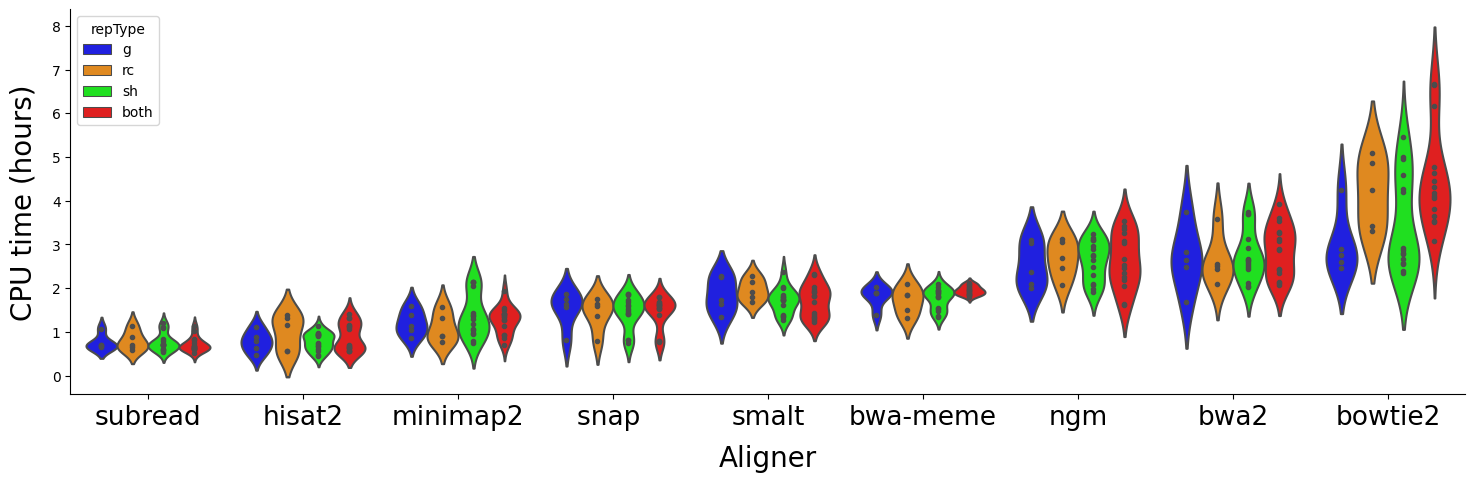

In [9]:
plot_stats(avg_df_stats, 'cpu', 'CPU time (hours)')


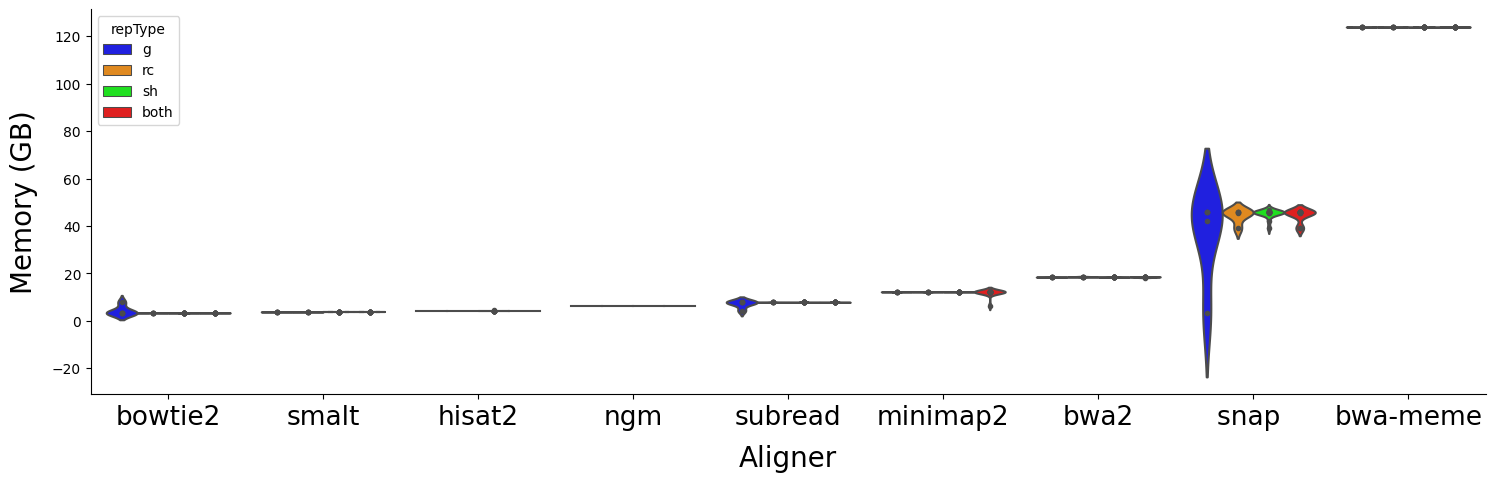

In [10]:
plot_stats(avg_df_stats, 'ram' ,'Memory (GB)')


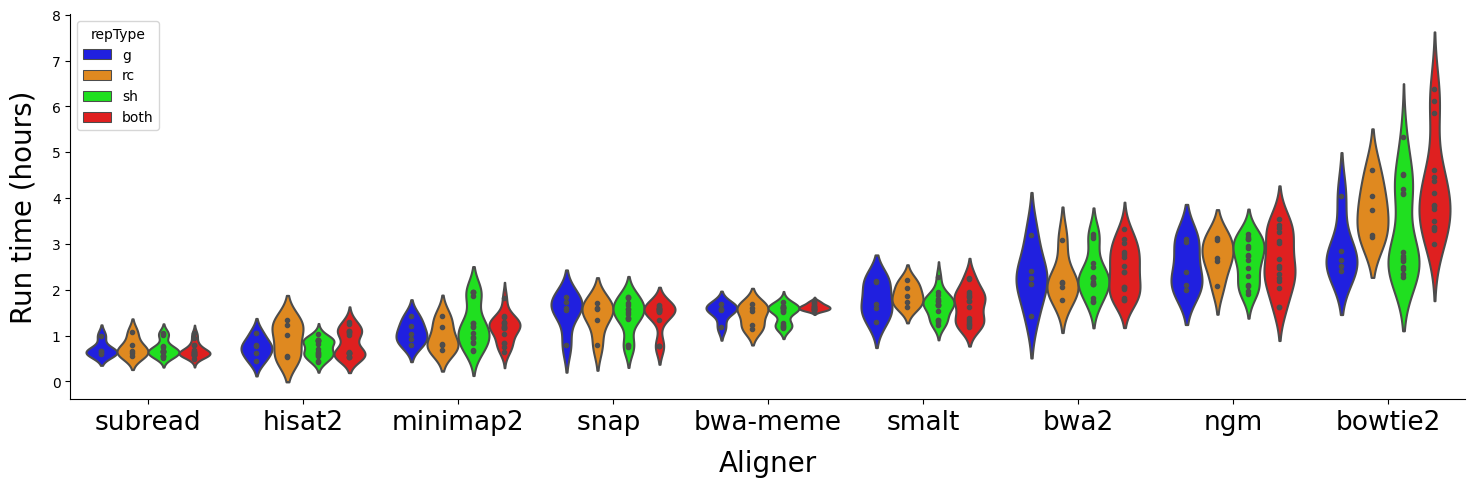

In [11]:
plot_stats(avg_df_stats, 'utime' ,'Run time (hours)')


In [13]:
stats_file2 = "/Users/fulbe/index_stats.csv"

In [14]:
df_stats2 = pd.read_csv(stats_file2)
df_stats2[df_stats2['tool'] == 'snap']['ram'].unique()
df_stats2.head()

,tool,cpu,ram,utime
0,bowtie2,3.573061,5.490,3.425327
1,bwa-meme,1.643396,61.570,1.473758
2,hisat2,1.291814,5.299,1.254840
3,minimap,0.046722,12.344,0.035630
4,snap,0.105474,29.722,0.096564


In [18]:
avg_df_stats2 = df_stats2.groupby(['tool'])['cpu', 'ram', 'utime'].mean().reset_index()
avg_df_stats2['tool'].unique()
avg_df_stats2.head()

C:\Temp\ipykernel_1736\2185414246.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_df_stats2 = df_stats2.groupby(['tool'])['cpu', 'ram', 'utime'].mean().reset_index()


,tool,cpu,ram,utime
0,bowtie2,3.573061,5.490,3.425327
1,bwa-meme,1.643396,61.570,1.473758
2,hisat2,1.291814,5.299,1.254840
3,minimap,0.046722,12.344,0.035630
4,snap,0.105474,29.722,0.096564


In [21]:
avg_df_stats2[(avg_df_stats2['tool'] == 'hisat2') & (avg_df_stats2['ram'].unique())]


,tool,cpu,ram,utime
2,hisat2,1.291814,5.299,1.25484


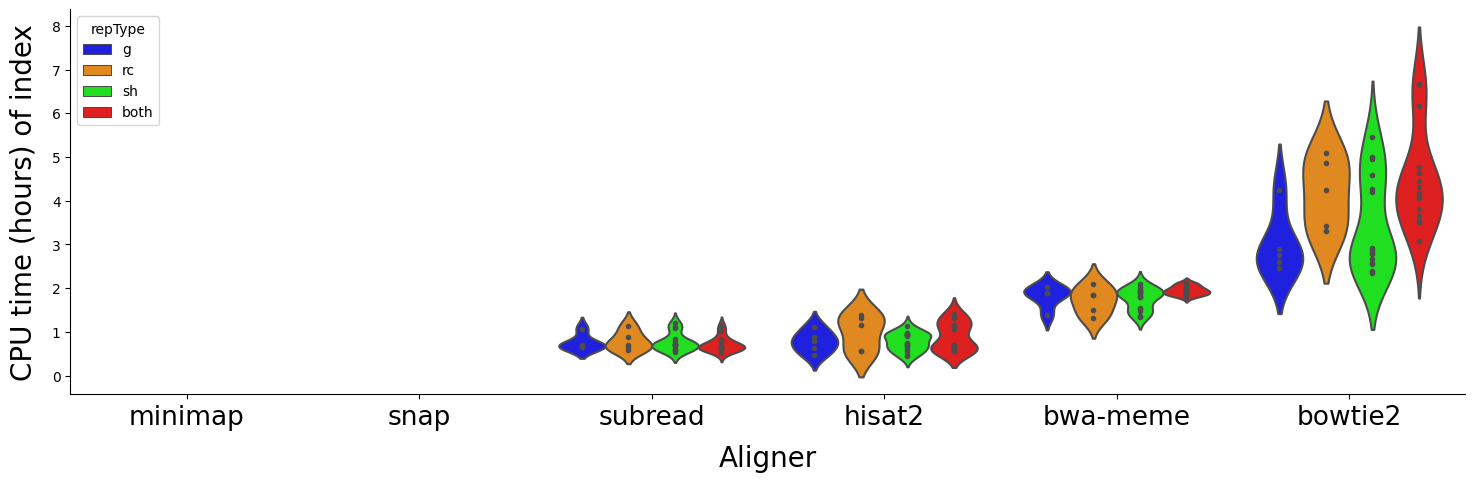

In [23]:
plot_stats(avg_df_stats2, 'cpu', 'CPU time (hours) of index')


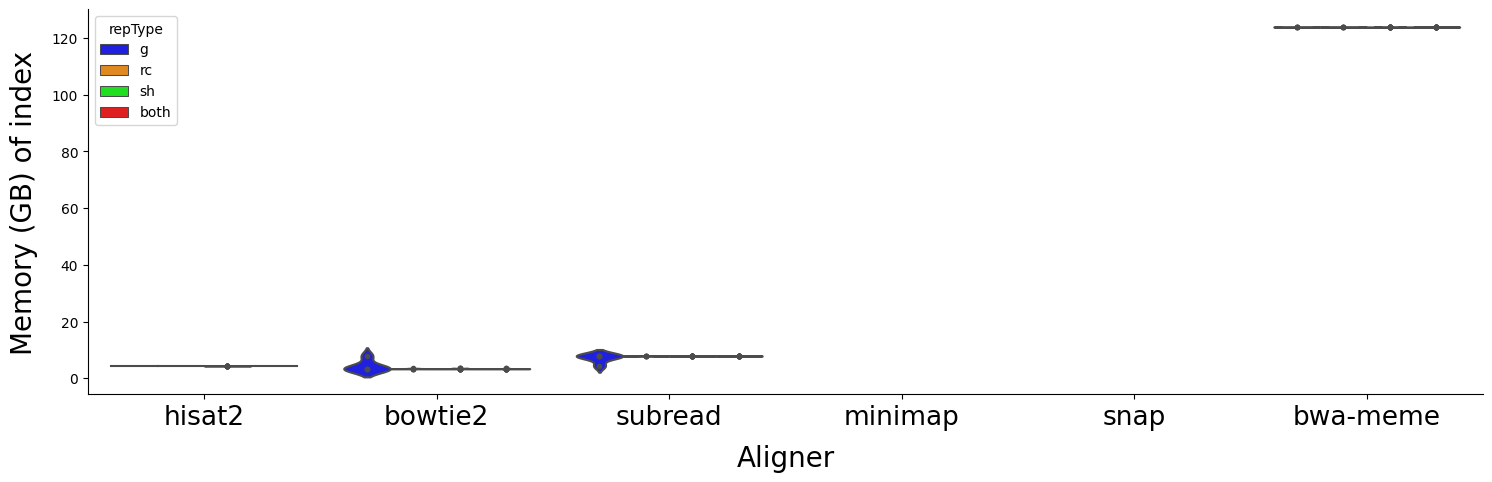

In [24]:
plot_stats(avg_df_stats2, 'ram' ,'Memory (GB) of index')


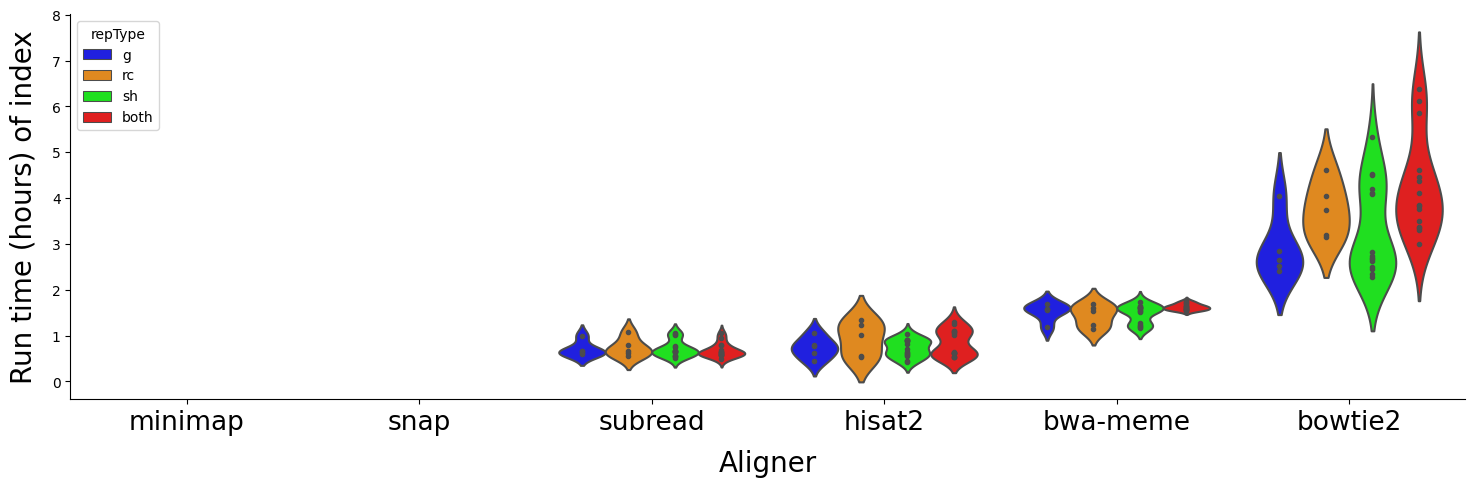

In [25]:
plot_stats(avg_df_stats2, 'utime' ,'Run time (hours) of index')
